# Feed Forward ANN 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [2]:
Data=pd.read_csv('D:\JupyterNotebook\GitHub\IoT-BotNet-detection-on-IoT23-dataset\IoT23\Data Preparation\iot23_combined_new_3M.csv', low_memory=False)

In [3]:
Data.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed_label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN


In [4]:
Data.tail()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed_label
2803565,122,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,udp,dhcp,90.034713,...,-,-,0.0,D,11.0,3608.0,0.0,0.0,Benign,NaN
2803566,123,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,icmp,-,90.39997,...,-,-,0.0,-,9.0,844.0,0.0,0.0,Benign,NaN
2803567,124,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,icmp,-,89.82403000000001,...,-,-,0.0,-,3.0,216.0,0.0,0.0,Benign,NaN
2803568,125,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,icmp,-,45.215915,...,-,-,0.0,-,8.0,648.0,0.0,0.0,Benign,NaN
2803569,126,1.562165e+09,CjD5ve2qwxfFtvd4zl,fe80::5bcc:698e:39d5:cdf,133.0,ff02::2,134.0,icmp,-,44.242222999999996,...,-,-,0.0,-,2.0,96.0,0.0,0.0,Benign,NaN


In [5]:
Data.shape

(2803570, 23)

In [6]:
del Data['Unnamed: 0']

In [46]:
df= Data.drop(columns=['history','id.orig_p','id.resp_p','ts','uid','id.orig_h','id.resp_h','local_orig','local_resp','detailed_label'])

In [47]:
df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,-,3e-06,0,0,S0,0.0,2.0,80.0,0.0,0.0,POHScan
1,tcp,-,2e-06,0,0,S0,0.0,2.0,80.0,0.0,0.0,POHScan
2,tcp,-,2e-06,0,0,S0,0.0,2.0,80.0,0.0,0.0,POHScan
3,tcp,-,2e-06,0,0,S0,0.0,2.0,80.0,0.0,0.0,POHScan
4,tcp,-,2e-06,0,0,S0,0.0,2.0,80.0,0.0,0.0,POHScan


In [48]:
df.replace('-',0, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803570 entries, 0 to 2803569
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   proto          object 
 1   service        object 
 2   duration       object 
 3   orig_bytes     object 
 4   resp_bytes     object 
 5   conn_state     object 
 6   missed_bytes   float64
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  label          object 
dtypes: float64(5), object(7)
memory usage: 256.7+ MB


In [50]:
X=df

In [51]:
X['orig_bytes']=X['orig_bytes'].astype(float)
X['duration']=X['duration'].astype(float)
X['resp_bytes']=X['resp_bytes'].astype(float)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803570 entries, 0 to 2803569
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   proto          object 
 1   service        object 
 2   duration       float64
 3   orig_bytes     float64
 4   resp_bytes     float64
 5   conn_state     object 
 6   missed_bytes   float64
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  label          object 
dtypes: float64(8), object(4)
memory usage: 256.7+ MB


In [53]:
X.shape

(2803570, 12)

In [54]:
Xt=X.iloc[:,:-1]

In [55]:
y=X['label']

In [56]:
cat_df =Xt.select_dtypes(include=['object']).copy()

In [57]:
cat_df

,proto,service,conn_state
0,tcp,0,S0
1,tcp,0,S0
2,tcp,0,S0
3,tcp,0,S0
4,tcp,0,S0
...,...,...,...
2803565,udp,dhcp,S0
2803566,icmp,0,OTH
2803567,icmp,0,OTH
2803568,icmp,0,OTH


In [58]:
cat_new= pd.get_dummies(cat_df, columns=['proto','service','conn_state'])

In [45]:
cat_new

,history,proto_icmp,proto_tcp,proto_udp,service_0,service_dhcp,service_dns,service_http,service_irc,service_ssh,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,S,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,S,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,S,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,S,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,S,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803565,D,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2803566,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803567,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803568,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
num_df =X.select_dtypes(exclude=['object']).copy()

In [60]:
Xe = pd.concat([num_df,cat_new], axis=1)

In [61]:
Xe.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.000003,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [62]:
Xe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803570 entries, 0 to 2803569
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   duration           float64
 1   orig_bytes         float64
 2   resp_bytes         float64
 3   missed_bytes       float64
 4   orig_pkts          float64
 5   orig_ip_bytes      float64
 6   resp_pkts          float64
 7   resp_ip_bytes      float64
 8   proto_icmp         uint8  
 9   proto_tcp          uint8  
 10  proto_udp          uint8  
 11  service_0          uint8  
 12  service_dhcp       uint8  
 13  service_dns        uint8  
 14  service_http       uint8  
 15  service_irc        uint8  
 16  service_ssh        uint8  
 17  service_ssl        uint8  
 18  conn_state_OTH     uint8  
 19  conn_state_REJ     uint8  
 20  conn_state_RSTO    uint8  
 21  conn_state_RSTOS0  uint8  
 22  conn_state_RSTR    uint8  
 23  conn_state_RSTRH   uint8  
 24  conn_state_S0      uint8  
 25  conn_state_S1     

In [64]:
Xe = np.asarray(Xe).astype(np.float32)

Let us encode the dummy encode the variables 

In [65]:
Y = pd.get_dummies(y).values

In [66]:
Y.shape

(2803570, 8)

In [67]:
x_scaler=MinMaxScaler()

In [68]:
x_scaler.fit(Xe)

MinMaxScaler()

In [70]:
Normalized_x=x_scaler.transform(Xe)

In [71]:
Normalized_x

array([[3.8051593e-11, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5367729e-11, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5367729e-11, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.1393158e-03, 7.4817073e-08, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.7351252e-04, 2.0782520e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.6116231e-04, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [72]:
Normalized_x.shape

(2803570, 31)

In [73]:
x_scaler.fit(Y)

MinMaxScaler()

In [74]:
normalized_y = x_scaler.transform(Y)

In [75]:
normalized_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

We are first developing a feed forward network for binary classification

In [76]:
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense,Conv1D,LSTM,Flatten
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.callbacks import EarlyStopping

In [77]:
from keras import Sequential

In [79]:
X_train, X_test, y_train, y_test = train_test_split(Normalized_x, normalized_y, test_size=0.2, random_state=10)

In [80]:
X_train.shape

(2242856, 31)

In [81]:
y_train.shape

(2242856, 8)

# Model Creation

In [80]:
model = Sequential()

In [85]:
model.add(Dense(78, activation='relu',input_dim=219))
model.add(Dense(38, activation='relu'))
model.add(Dense(8, activation='softmax'))
opt=Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])


In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 78)                17160     
                                                                 
 dense_1 (Dense)             (None, 38)                3002      
                                                                 
 dense_2 (Dense)             (None, 8)                 312       
                                                                 
Total params: 20,474
Trainable params: 20,474
Non-trainable params: 0
_________________________________________________________________


In [85]:
import time

In [88]:
start = time.time()
print('program start...')
print()

history = model.fit(X_train, y_train, batch_size=128,epochs =20,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/20
17523/17523 [==============================] - 49s 3ms/step - loss: 0.4565 - accuracy: 0.7649 - val_loss: 0.4326 - val_accuracy: 0.7684
Epoch 2/20
17523/17523 [==============================] - 50s 3ms/step - loss: 0.4333 - accuracy: 0.7684 - val_loss: 0.4319 - val_accuracy: 0.7684
Epoch 3/20
17523/17523 [==============================] - 46s 3ms/step - loss: 0.4325 - accuracy: 0.7685 - val_loss: 0.4320 - val_accuracy: 0.7685
Epoch 4/20
17523/17523 [==============================] - 47s 3ms/step - loss: 0.4323 - accuracy: 0.7685 - val_loss: 0.4325 - val_accuracy: 0.7685
Epoch 5/20
17523/17523 [==============================] - 47s 3ms/step - loss: 0.4320 - accuracy: 0.7685 - val_loss: 0.4315 - val_accuracy: 0.7685
Epoch 6/20
17523/17523 [==============================] - 47s 3ms/step - loss: 0.4319 - accuracy: 0.7685 - val_loss: 0.4328 - val_accuracy: 0.7685
Epoch 7/20
17523/17523 [==============================] - 47s 3ms/step - loss: 0.4318 - accuracy: 0.

<<<<<=====the reason for huge loss value here is the learning rate and complexity of the model....======>>

In [86]:
import matplotlib.pyplot as plt

In [91]:
_, acc= model.evaluate(X_test, y_test)
print("Accuracy =", (acc* 100.0), "%")

17523/17523 [==============================] - 27s 2ms/step - loss: 0.4323 - accuracy: 0.7685
Accuracy = 76.846843957901 %


In [92]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs=range(1, len(loss_train) +1)

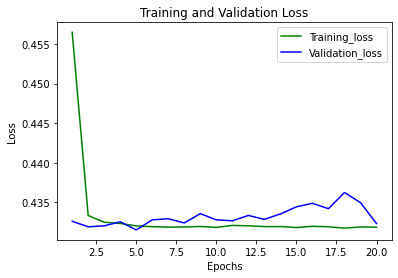

In [93]:
plt.plot(epochs, loss_train, 'g', label='Training_loss')
plt.plot(epochs, loss_val, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\Nueral Network IoT23\first_3M_model.tiff', bbox_inches='tight', dpi=500)
plt.show()

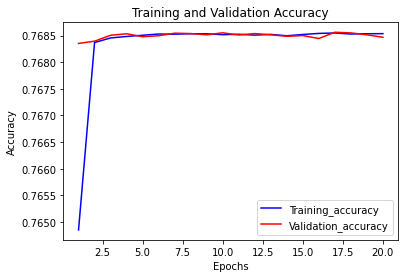

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\Nueral Network IoT23\first_3Ms_model_acc.tiff', bbox_inches='tight', dpi=500)
plt.show()

New model with normalized data and with no history attributes

In [82]:
model_a = Sequential()

In [83]:
model_a.add(Dense(78, activation='relu',input_dim=31))
model_a.add(Dense(38, activation='relu'))
model_a.add(Dense(8, activation='softmax'))
opt=Adam(learning_rate=0.001)

model_a.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])


In [87]:
start = time.time()
print('program start...')
print()

history = model_a.fit(X_train, y_train, batch_size=256,epochs =20,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/20
8762/8762 [==============================] - 16s 2ms/step - loss: 0.5912 - accuracy: 0.7664 - val_loss: 0.5809 - val_accuracy: 0.7675
Epoch 2/20
8762/8762 [==============================] - 16s 2ms/step - loss: 0.5821 - accuracy: 0.7675 - val_loss: 0.5808 - val_accuracy: 0.7675
Epoch 3/20
8762/8762 [==============================] - 15s 2ms/step - loss: 0.5820 - accuracy: 0.7675 - val_loss: 0.5808 - val_accuracy: 0.7675
Epoch 4/20
8762/8762 [==============================] - 15s 2ms/step - loss: 0.5819 - accuracy: 0.7675 - val_loss: 0.5809 - val_accuracy: 0.7675
Epoch 5/20
8762/8762 [==============================] - 16s 2ms/step - loss: 0.5819 - accuracy: 0.7675 - val_loss: 0.5806 - val_accuracy: 0.7675
Epoch 6/20
8762/8762 [==============================] - 17s 2ms/step - loss: 0.5818 - accuracy: 0.7675 - val_loss: 0.5807 - val_accuracy: 0.7675
Epoch 7/20
8762/8762 [==============================] - 17s 2ms/step - loss: 0.5818 - accuracy: 0.7675 - val_los

In [88]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs=range(1, len(loss_train) +1)

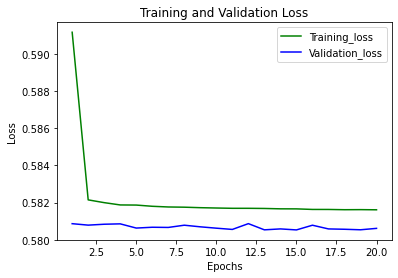

In [89]:
plt.plot(epochs, loss_train, 'g', label='Training_loss')
plt.plot(epochs, loss_val, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\Nueral Network IoT23\sec_3M_model.tiff', bbox_inches='tight', dpi=500)
plt.show()

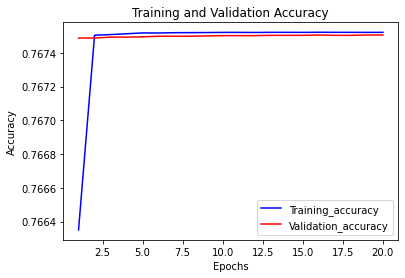

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\Nueral Network IoT23\sec_3Ms_model_acc.tiff', bbox_inches='tight', dpi=500)
plt.show()

In [92]:
file_name = 'FFNN-ModA_IoT23_3M_model'
model_a.save('file_name')

INFO:tensorflow:Assets written to: file_name\assets


Model B

In [93]:
model_b = Sequential()

In [94]:
model_b.add(Dense(512, activation='relu',input_dim=31))
model_b.add(Dense(256, activation='relu'))
model_b.add(Dense(128, activation='relu'))
model_b.add(Dense(8, activation='softmax'))
opt=Adam(learning_rate=0.0001)

model_b.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])


In [95]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               16384     
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 181,640
Trainable params: 181,640
Non-trainable params: 0
_________________________________________________________________


In [96]:
start = time.time()
print('program start...')
print()

history = model_b.fit(X_train, y_train, batch_size=256,epochs =30,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/30
8762/8762 [==============================] - 38s 4ms/step - loss: 0.5946 - accuracy: 0.7668 - val_loss: 0.5811 - val_accuracy: 0.7675
Epoch 2/30
8762/8762 [==============================] - 41s 5ms/step - loss: 0.5822 - accuracy: 0.7675 - val_loss: 0.5808 - val_accuracy: 0.7675
Epoch 3/30
8762/8762 [==============================] - 41s 5ms/step - loss: 0.5820 - accuracy: 0.7675 - val_loss: 0.5812 - val_accuracy: 0.7675
Epoch 4/30
8762/8762 [==============================] - 42s 5ms/step - loss: 0.5819 - accuracy: 0.7675 - val_loss: 0.5809 - val_accuracy: 0.7675
Epoch 5/30
8762/8762 [==============================] - 41s 5ms/step - loss: 0.5818 - accuracy: 0.7675 - val_loss: 0.5806 - val_accuracy: 0.7675
Epoch 6/30
8762/8762 [==============================] - 43s 5ms/step - loss: 0.5818 - accuracy: 0.7675 - val_loss: 0.5806 - val_accuracy: 0.7675
Epoch 7/30
8762/8762 [==============================] - 44s 5ms/step - loss: 0.5818 - accuracy: 0.7675 - val_los